# Steel Plates Faults

## Modeling

In [66]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [68]:
df = pd.read_csv('./Faults.csv', index_col=0)
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,class
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,0,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0026,0.7254,0,0,0,0,0,0,1,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.0582,0.8173,0,0,0,0,0,0,1,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0052,0.7079,0,0,0,0,0,0,1,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0171,0.9919,0,0,0,0,0,0,1,Other_Faults


In [69]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'class'],
      dtype='object')

In [70]:
x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = df['K_Scatch']

In [71]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

**Z-Score**
$\text{표준편차를 단위로 봤을 때 측정치가 평균에서 얼마만큼 일탈하였는가를 확인} \\
\text{각 데이터의 단위가 다르더라도 동일선상에서 얼마만큼 평균에서 떨어져있는지를 같은 Z-score 기준으로 확인가능}\\
\rightarrow z = \cfrac{\text{score}-\text{mean}}{\text{standard deviation}} = \cfrac{x-\text{mean}}{\text{standard deviation}}$

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y) 
#stratify=y: y값의 비율을 유지한체 split

In [73]:
x_train = x_train.apply(zscore)
x_test = x_test.apply(zscore)

In [74]:
x_train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,...,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03
mean,-1.075886e-16,-2.632488e-17,-4.578239e-17,-2.174664e-17,6.867359e-18,-2.289120e-17,-2.289120e-18,-2.289120e-18,2.266228e-16,-6.764349e-16,...,-4.177643e-17,8.469743e-17,-1.682503e-16,1.831296e-17,2.666824e-16,6.352307e-17,6.867359e-18,3.891503e-17,4.349327e-17,1.133114e-16
std,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,...,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00
min,-1.103367e+00,-1.241076e+00,-9.104613e-01,-9.104788e-01,-3.483794e-01,-3.406371e-01,-1.767603e-01,-3.893515e-01,-2.643140e+00,-5.071400e+00,...,-5.289097e-01,-2.468152e+00,-3.280170e+00,-1.185811e+00,-2.774003e+00,-2.156377e+00,-3.067242e+00,-2.143465e+00,-5.839974e+00,-1.367353e+00
25%,-9.883000e-01,-8.621817e-01,-6.562362e-01,-6.562372e-01,-3.333730e-01,-3.004833e-01,-1.514077e-01,-3.719521e-01,-6.554519e-01,-3.480654e-01,...,-4.443167e-01,-7.982123e-01,-9.250766e-01,-1.185811e+00,-7.146692e-01,-6.985005e-01,-6.999318e-01,-8.252854e-01,-4.361607e-01,-9.978418e-01
50%,-2.637179e-01,-2.988794e-01,-2.545875e-01,-2.546108e-01,-3.171771e-01,-2.665069e-01,-1.260551e-01,-3.538504e-01,1.675751e-01,-1.851918e-01,...,-3.870920e-01,1.006070e-01,5.824951e-01,8.913658e-01,-3.182921e-01,-3.312158e-01,-1.668921e-01,2.490715e-02,-1.325061e-02,-2.443915e-01
75%,9.307593e-01,9.199295e-01,2.919470e-01,2.919292e-01,-2.027537e-01,-8.967550e-02,-1.144025e-02,-2.343737e-01,6.567327e-01,5.205939e-01,...,-1.623398e-01,7.575785e-01,7.858832e-01,8.913658e-01,5.254920e-01,3.829141e-01,7.329140e-01,8.448359e-01,4.324923e-01,1.226000e+00
max,2.180122e+00,2.203231e+00,6.155444e+00,6.155404e+00,2.758779e+01,3.192762e+01,3.817116e+01,2.140560e+01,3.661558e+00,6.601209e+00,...,1.397465e+01,1.578793e+00,7.858832e-01,8.913658e-01,3.420237e+00,3.627366e+00,6.274553e+00,1.830314e+00,5.180199e+00,1.226589e+00


## Grid Search
### LogisticRegression

In [75]:
from sklearn.model_selection import GridSearchCV #각 모델의 파라미터를 최적화하는데 사용
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from colorama import Fore

### Subset Selection
[Reference](https://direction-f.tistory.com/75)
$\text{- 사용 가능한 Dependent Variable들이 많으나 어떤 것이 유의미한 변수인지 선택하기 어려울 때 활용할만한 변수를 선정하기위해 적용하는 방법}\\
\: \cdot \textbf{Best Subset Selection}\\
\: \cdot \textbf{Stepwise Selection} \\
\rightarrow \text{Best Subset Selection은 모든 모델을 고려하여 가장 좋은 모델을 선택하는만큼 계산효율성이 떨어짐}\\
\rightarrow \text{Stepwise Selection은 크게 }\textbf{Forward Stepwise Selection, Backward Stepwise Selection } \text{으로 구분} \\
\quad \cdot \text{Forward Stepwise Selection: 변수사이즈 0부터 시작하여 하나씩 변수를 추가}\\
\quad \cdot \text{Backward Stepwise Selection: Full model로 시작하여 하나씩 변수를 제거}\\
$
$
\textbf{Grid Search}\text{ 기반에 Subset Selection은 }\textbf{Discrete Process}\text{ 이기 때문에 종종 중요한 변수를 놓치거나 중요하지 않은 변수를 포함하는 경우가 있음}
$

**The Lasso**  
[Reference](https://modern-manual.tistory.com/22)
- 최소제곱법과 유사하나 '각 계수 절댓값의 합'을 수식에 포함하여 계수의 크기도 함께 최소화하도록 만든다.
- Lasso를 사용하면 자연스럽게 Subset selection효과가 나타난다.  
$\textbf{RSS}+\lambda\sum\limits_{j=1}^{p}|\beta_j|$
- 위 식에 대해 **Gradient descent**를 수행하면 일부 덜 중요한 계수들이 0으로 수렴하는 결과가 나온다.
- 위 식에 미분을 사용하여 풀 때, 절대값으로인해 꺾이는 부분은 0으로 치환하여 처리하고 나머지 부분은 미분가능하다.
<img src="./Lasso_Ridge.jpeg" width="500px" height="300px" title="Lasso and Lidge"></img>
- Lasso는 절대값이 들어간 수식으로인해 모서리가 뾰족한 마름모 형태를 나타내므로 일부의 $\beta$는 0이되는 파라미터의 조합을 고르게된다.
- Ridge regression은 $\beta_j^2$을 사용하여 파란 원형과 같이 그려진다. 둥근 모서리를 갖고 있기 때문에 계수가 적당히 작은 값을 취하지만 0이 되지는 않는다.

**Intuition of Lasso**
- Lasso를 적용하여 모델의 Performance가 더 좋아졌다면, 데이터의 일부 파라미터를 제거하는 것이 더 결과가 좋다는 Insight를 가질 수 있다.

**The Ridge Regression**  
[Reference](https://modern-manual.tistory.com/21)
- 기본 선형모델을 사용하다보면 Overfitting이 발생. 이를 표현하는 선형회귀의 계수값은 매우 크게 표현
- 예) $y = 123123 - 123324x + 234234x^2$
- 이렇게 Variance가 큰 상황을 막기위해 계수 자체가 크면 페널티를 주는 수식을 추가한 것이 **Ridge Regression**
- **Ridge Regression**은 오차를 최소화하는 함수에 페널티를 줌으로써 보다 부드럽게 계수를 선택하는 차이가 형성
- **Ridge Regression**은 기본 선형모델을 Regularize하여 보다 좋은 Performance를 내기위해 시도해볼 수 있는 기본 기법임

**Scaling of Ridge**
- Ridge는 변수의 크기에 따라 결과가 크게 변화되므로 변수를 스케일리ㅇ하여 서로 사이즈가 비슷하도록 만들어주는 작업이 필요
- 일반적으로 표준편차를 각 Predictors마다 구한 뒤 각 데이터에 나눠줌

In [76]:
### C: 회귀 계수의 제한되는 정도의 실수값 (클수록 강하게 제한)
### penalty: l1, l2
### solver: 'liblinear'일 때 l1 penalty 사용 가능.
### tol: 언제까지 학습할지 결정. default=1e-4
lm=LogisticRegression(solver='liblinear')

In [77]:
parameters={'penalty':['l1','l2'], 'C':[0.01, 0.1, 0.5, 0.9, 1, 5, 10], 'tol':[1e-4, 1e-2, 1e2]}

In [78]:
import os
n_thread = os.cpu_count()

In [79]:
GSLR=GridSearchCV(lm, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')

In [80]:
# Cross-Validation check
GSLR.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'), n_jobs=8,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.01, 100.0]},
             scoring='accuracy')

In [81]:
print('final params', GSLR.best_params_)
print('best score', GSLR.best_score_)

final params {'C': 1, 'penalty': 'l2', 'tol': 0.0001}
best score 0.9722911497105045


In [82]:
GSLR_pred = GSLR.predict(x_test)
GSLR_acc = accuracy_score(y_test, GSLR_pred)
print(classification_report(y_test, GSLR_pred))
print(Fore.GREEN + f"Accuracy of Logistic Regression is: {100*GSLR_acc:2.2f}%")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       311
           1       0.92      0.92      0.92        78

    accuracy                           0.97       389
   macro avg       0.95      0.95      0.95       389
weighted avg       0.97      0.97      0.97       389

Accuracy of Logistic Regression is: 96.92%


<Figure size 500x500 with 0 Axes>

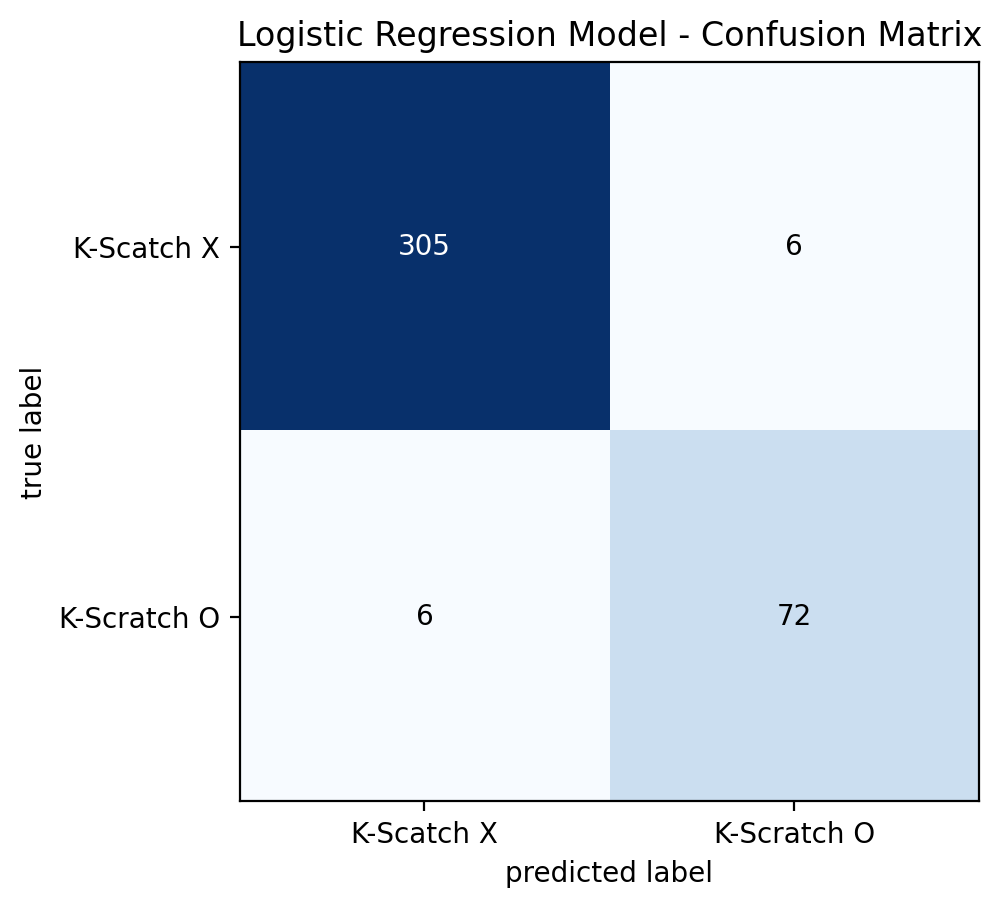

In [108]:
cm = confusion_matrix(y_test, GSLR_pred)
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, hide_ticks=True, cmap=plt.cm.Blues)
plt.title('Logistic Regression Model - Confusion Matrix')
plt.xticks(range(2), ["K-Scatch X", 'K-Scratch O'], fontsize=10)
plt.yticks(range(2), ["K-Scatch X", 'K-Scratch O'], fontsize=10)
plt.show()

In [109]:
# Cross validation 과정에서 계산된 정확도 값들을 출력
means = GSLR.cv_results_['mean_test_score']
stds = GSLR.cv_results_['std_test_score']
params = GSLR.cv_results_['params']
for mean, std, params in zip(means, stds, params):
    print("{0:.3f} (+/-{1:.03f}) for {2}".format(mean, std*2, params))

0.945 (+/-0.037) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.0001}
0.945 (+/-0.034) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.01}
0.798 (+/-0.005) for {'C': 0.01, 'penalty': 'l1', 'tol': 100.0}
0.950 (+/-0.033) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.0001}
0.950 (+/-0.033) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.01}
0.798 (+/-0.005) for {'C': 0.01, 'penalty': 'l2', 'tol': 100.0}
0.964 (+/-0.028) for {'C': 0.1, 'penalty': 'l1', 'tol': 0.0001}
0.963 (+/-0.027) for {'C': 0.1, 'penalty': 'l1', 'tol': 0.01}
0.798 (+/-0.005) for {'C': 0.1, 'penalty': 'l1', 'tol': 100.0}
0.966 (+/-0.021) for {'C': 0.1, 'penalty': 'l2', 'tol': 0.0001}
0.966 (+/-0.021) for {'C': 0.1, 'penalty': 'l2', 'tol': 0.01}
0.798 (+/-0.005) for {'C': 0.1, 'penalty': 'l2', 'tol': 100.0}
0.969 (+/-0.028) for {'C': 0.5, 'penalty': 'l1', 'tol': 0.0001}
0.968 (+/-0.027) for {'C': 0.5, 'penalty': 'l1', 'tol': 0.01}
0.798 (+/-0.005) for {'C': 0.5, 'penalty': 'l1', 'tol': 100.0}
0.969 (+/-0.023) for {'C': 0.5, 'penalty': 'l2', 

## Decision Tree
**Parameters**
- criterion: gini, enropy
- max_depth: 최대 깊이를 제한
- min_samples_split: 한 노드에 들어있는 최소 데이터 수 제한
- min_samples_leaf
- max_features: 변수의 개수를 제한

**Pruning**: Overfitting을 낮추기 위해 '가지치기'를 실행

In [110]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
dt_clf_pred = dt_clf.predict(x_test)
dt_clf_acc = accuracy_score(y_test, dt_clf_pred)
print(classification_report(y_test, dt_clf_pred))
print(Fore.GREEN + f"Accuracy of Decision Tree is: {100*dt_clf_acc:2.2f}%")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       311
           1       0.97      0.95      0.96        78

    accuracy                           0.98       389
   macro avg       0.98      0.97      0.98       389
weighted avg       0.98      0.98      0.98       389

Accuracy of Decision Tree is: 98.46%


In [111]:
parameters = {'criterion':['gini', 'entropy'],
              'min_samples_split':[2, 5, 10, 15],
              'max_depth':[None, 2],
              'min_samples_leaf':[1, 3, 10, 15],
              'max_features':[None, 'sqrt', 'log2'],
             }

In [112]:
dt = DecisionTreeClassifier()
GSDT = GridSearchCV(dt, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GSDT.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [113]:
print("Final Params:", GSDT.best_params_)
print("Best Score:", GSDT.best_score_)

Final Params: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.9780934656741108


In [114]:
GSDT_pred = GSDT.predict(x_test)
GSDT_acc = accuracy_score(y_test, GSDT_pred)
print(classification_report(y_test, GSDT_pred))
print(Fore.GREEN + f"Accuracy of GridSearch Decision Tree: {100*GSDT_acc:2.2f}%")

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       311
           1       0.96      0.90      0.93        78

    accuracy                           0.97       389
   macro avg       0.97      0.94      0.95       389
weighted avg       0.97      0.97      0.97       389

Accuracy of GridSearch Decision Tree: 97.17%


<Figure size 500x500 with 0 Axes>

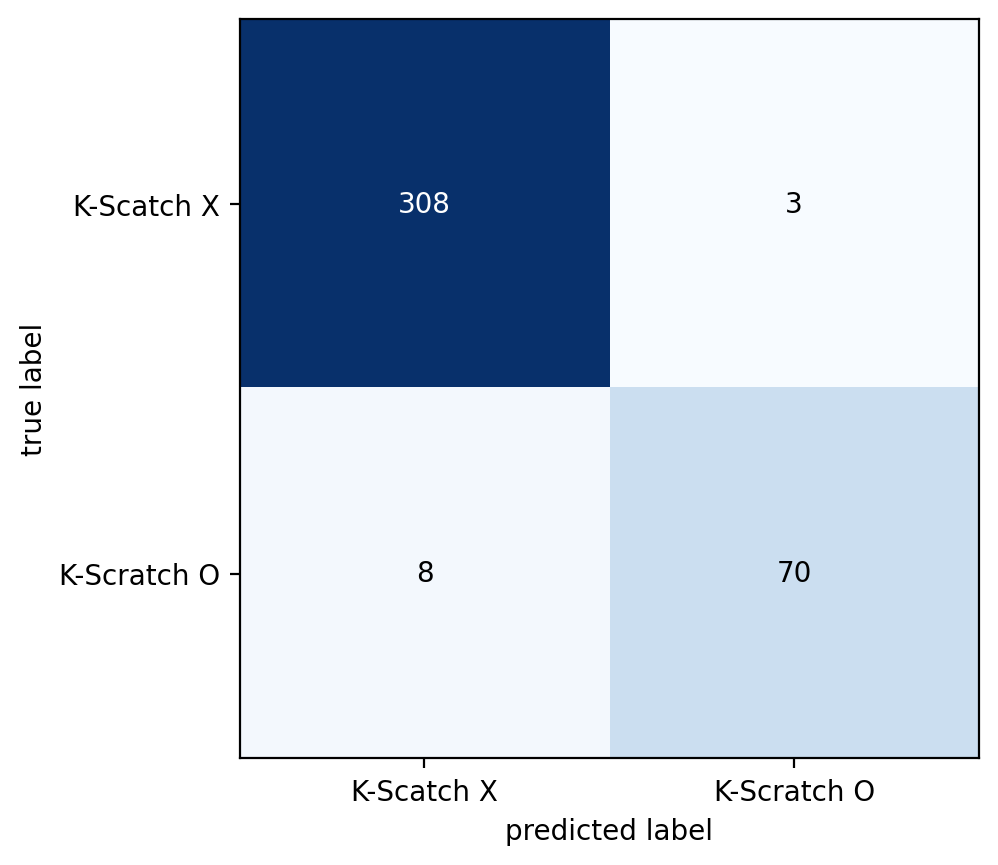

In [115]:
cm = confusion_matrix(y_test, GSDT_pred)
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, cmap=plt.cm.Blues, hide_ticks=True)
plt.xticks(range(2), ["K-Scatch X", 'K-Scratch O'], fontsize=10)
plt.yticks(range(2), ["K-Scatch X", 'K-Scratch O'], fontsize=10)
plt.show()

In [116]:
# train에서 종속변수의 분포
print(y_train.value_counts())

0    1239
1     313
Name: K_Scatch, dtype: int64


In [120]:
import graphviz
import sklearn.tree as tree
dt2 = DecisionTreeClassifier(criterion = 'entropy',
                           max_depth = None,
                           max_features = None,
                           min_samples_leaf = 1,
                           min_samples_split = 10
                          )
dt2.fit(x_train, y_train)
dot_data = tree.export_graphviz(dt2, feature_names=x_train.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

There is no layout engine support for "dot"
Perhaps "dot -c" needs to be run (with installer's privileges) to register the plugins?


CalledProcessError: Command '[PosixPath('dot'), '-Kdot', '-Tsvg']' returned non-zero exit status 1. [stderr: 'There is no layout engine support for "dot"\nPerhaps "dot -c" needs to be run (with installer\'s privileges) to register the plugins?\n']